In [129]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import ols_functions as of
import pickle

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['figure.facecolor'] = 'white'

pd.options.display.max_columns = 150
pd.options.display.max_rows = 150


In [5]:
with open("rfregressor_gridsearch_best_estimator.pickle") as f:
    gmodel = pickle.load(f)

In [6]:
with open('ensemble_data.pickle') as f:
    data = pickle.load(f)

df_train = data['xtrain']
df_val = data['xval']
df_test = data['xtest']

y_train = data['ytrain']
y_val = data['yval']
y_test = data['ytest']

In [31]:
df_all = pd.concat([df_train, df_val, df_test])

# Feature importance

In [177]:
ft = df_all.columns.values[1:]
from eli5 import sklearn
explanation = sklearn.explain_rf_feature_importance(gmodel, feature_names=ft)

In [179]:
ft_names = [x.feature for x in explanation.feature_importances.importances]
ft_vals = [x.weight for x in explanation.feature_importances.importances]


/usr/local/lib/python2.7/site-packages/seaborn/categorical.py:342: DeprecationWarning: pandas.core.common.is_categorical_dtype is deprecated. import from the public API: pandas.api.types.is_categorical_dtype instead
  elif is_categorical(y):


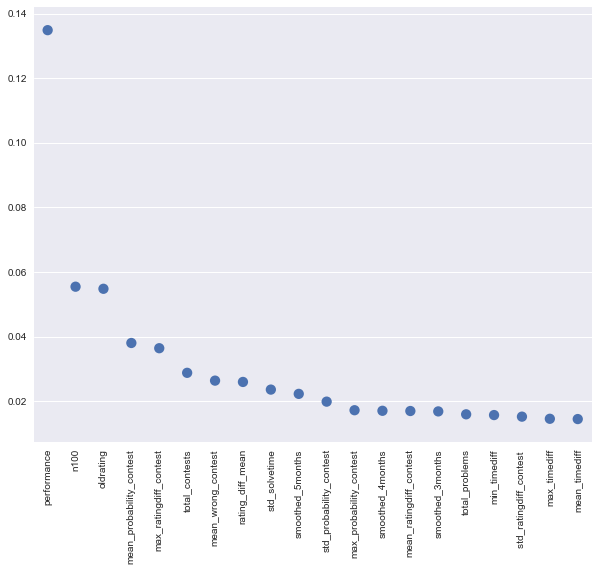

In [182]:
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams['figure.figsize'] = (10, 8)

sns.pointplot(ft_names, ft_vals, join=False)
ax = plt.gca()
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
pp = PdfPages('fig_feature_importance_paths_rf.pdf')
plt.savefig(pp, format='pdf')
pp.close()

# Create last examples for demo

In [32]:
handles = set([x[0] for x in df_all.index])

In [39]:
df_all.reset_index(inplace=True)

In [46]:
df_all.drop('contestid', axis=1, inplace=True)

In [66]:
df_all.copy = False
last_ex = []
g = df_all.groupby('handle')
for k, v in g:
    ex = v.sort_index().iloc[-1]
    last_ex.append(pd.DataFrame([ex]))

In [67]:
last_ex = pd.concat(last_ex)

In [69]:
last_ex.to_csv("RFregressor_lastex.csv", index=False)

In [70]:
last_ex = pd.read_csv('RFregressor_lastex.csv')

In [71]:
last_ex.head()

,handle,java,lowlevel,max_error_contest,max_error_practice,max_probability_contest,max_probability_practice,max_ratingdiff_contest,max_ratingdiff_practice,max_solvetime,max_timediff,max_wrong_contest,max_wrong_practice,mean_error_contest,mean_error_practice,mean_probability_contest,mean_probability_practice,mean_ratingdiff_contest,mean_ratingdiff_practice,mean_solvetime,mean_timediff,mean_wrong_contest,mean_wrong_practice,min_solvetime,min_timediff,n100,n200,n300,n400,n500,n_solved,n_unlikely01,n_unlikely02,oldrating,performance,python,smoothed_1months,smoothed_2months,smoothed_3months,smoothed_4months,smoothed_5months,std_error_contest,std_error_practice,std_probability_contest,std_probability_practice,std_ratingdiff_contest,std_ratingdiff_practice,std_solvetime,std_timediff,std_wrong_contest,std_wrong_practice,tot_solvetime,total_contests,total_error_contest,total_error_practice,total_newtags,total_problems,total_wrong_contest,total_wrong_practice,unique_newtags,unique_tags_total,*special,2-sat,binary search,bitmasks,brute force,chinese remainder theorem,combinatorics,constructive algorithms,data structures,dfs and similar,divide and conquer,dp,dsu,expression parsing,fft,flows,games,geometry,graph matchings,graphs,greedy,hashing,implementation,math,matrices,meet-in-the-middle,n_contest,n_harder,n_harder100,n_harder50,n_harder500,n_wrong_mean,n_wrong_std,number theory,probabilities,problems_solved,rating_diff_mean,rating_diff_std,schedules,shortest paths,sortings,string suffix structures,strings,ternary search,time_between_mean,time_between_std,trees,two pointers
0,-----,0,1,0.0,0.0,0.848405,0.000000,558.833333,0.000000,0.000000,-0.012905,0.0,0.0,0.0,0.000000,0.443470,0.000000,129.833333,0.000000,0.000000,-0.012905,0.000000,0.000000,0.0,-0.012905,1,1,1,1,1,2,1,1,1234,1.000000,0,1178.666667,1192.800000,1206.166667,1221.142857,1221.142857,0.000000,0.000000,0.404935,0.000000,429.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9,0.0,0.0,0,74,0.0,0.0,0,22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,1.0,1.0,0.0,0.400000,0.489898,1.0,0.0,3.0,-107.000000,280.913510,0.0,0.0,0.0,0.0,0.0,0.0,262634.500000,262008.500000,0.0,0.0
1,----ensist----,1,0,3.0,3.0,0.930985,0.869850,39.000000,733.000000,18.988889,8.963831,2.0,4.0,0.5,0.636364,0.705590,0.513985,-189.666667,33.909091,1.192183,1.014711,0.833333,1.090909,-1.0,-1.865278,2,2,2,2,2,11,2,2,1458,0.555891,0,1479.000000,1479.000000,1479.000000,1479.000000,1479.000000,1.118034,1.149919,0.185096,0.313520,178.940089,349.651373,4.955673,2.666279,0.687184,1.164204,16.690556,2,3.0,7.0,4,45,5.0,12.0,4,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,---Grigor---,0,1,0.0,3.0,0.945290,0.999995,488.000000,488.000000,0.316111,14.131898,3.0,4.0,0.0,0.428571,0.646938,0.863572,-160.333333,-1013.142857,-0.156358,2.280558,1.666667,2.142857,-1.0,-0.125127,0,0,0,0,0,7,1,1,2132,1.000000,0,2132.000000,2132.000000,2132.000000,2132.000000,2132.000000,0.000000,1.049781,0.417277,0.329353,458.521052,718.804052,0.460243,4.687683,0.942809,1.641304,-1.407222,95,0.0,3.0,0,1171,5.0,15.0,0,33,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,--ARYA--,0,1,0.0,0.0,0.999921,0.990866,222.857143,660.857143,17.230000,11.802928,3.0,6.0,0.0,0.000000,0.813000,0.583671,-751.870130,-108.742857,0.629696,1.403695,0.909091,1.300000,-1.0,-5.829931,3,2,1,1,1,15,1,2,1698,0.037527,0,1699.500000,1699.500000,1640.142857,1641.888889,1612.928571,0.000000,0.000000,0.267951,0.348637,716.256568,421.049926,3.763309,3.976901,0.995859,1.951922,13.223611,14,0.0,0.0,0,166,10.0,13.0,0,30,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0

In [73]:
np.max(last_ex, axis=0)

handle                          zzzz8228
java                                   1
lowlevel                               1
max_error_contest                     46
max_error_practice                    35
max_probability_contest                1
max_probability_practice               1
max_ratingdiff_contest              4042
max_ratingdiff_practice             3858
max_solvetime                    21686.1
max_timediff                     2121.89
max_wrong_contest                    149
max_wrong_practice                   111
mean_error_contest                    10
mean_error_practice                 17.5
mean_probability_contest               1
mean_probability_practice              1
mean_ratingdiff_contest          1912.75
mean_ratingdiff_practice            3717
mean_solvetime                   21686.1
mean_timediff                    1371.97
mean_wrong_contest               51.6667
mean_wrong_practice                   30
min_solvetime                    21686.1
min_timediff    

In [ ]:
last_ex.set_index('handle', inplace=True)

In [84]:
import psycopg2
con = psycopg2.connect(database='codeforces', user="Joy")
q = """ 
select tag from all_tags
"""
all_tags = pd.read_sql(q, con)['tag']
all_tags = set(all_tags)

In [140]:
test = last_ex.loc['tourist', df_train.columns]

gmodel.predict([test])

array([ 2.55])

In [141]:
orig = gmodel.predict([test])[0]
good = []
bad = []
for t in list(all_tags) + ['n100', 'n200', 'n300', 'n400', 'n500', 'n_solved']:
#for t in ['max_wrong_practice', 'max_wrong_contest', 'max_timediff', 'std_timediff', 'tot_solvetime']:
#for t in ['oldrating']:
#for t in ['mean_ratingdiff_contest', 'mean_ratingdiff_practice']:
#for t in ['fft']:
    e = test.copy()
    e[t] += 20
    delta = gmodel.predict([e])[0] - orig
    if  delta > 0:
        good.append((t, delta))
    else:
        bad.append((t, delta))

print good
print bad


[('greedy', 0.49000000000000021), ('matrices', 0.20999999999999996), ('implementation', 3.5200000000000005), ('dsu', 1.4699999999999998), ('dfs and similar', 3.2300000000000004), ('graph matchings', 1.5499999999999998), ('probabilities', 0.87000000000000011), ('divide and conquer', 1.7700000000000005), ('trees', 0.44000000000000039), ('data structures', 1.4400000000000004), ('flows', 2.1100000000000003), ('sortings', 0.27000000000000002), ('dp', 3.5800000000000001), ('bitmasks', 13.43), ('*special', 5.2999999999999998), ('geometry', 2.8100000000000005), ('combinatorics', 0.83000000000000007), ('graphs', 0.54000000000000004), ('brute force', 6.6499999999999995), ('games', 4.1800000000000006), ('binary search', 1.9300000000000006), ('strings', 0.8400000000000003), ('n100', 6.9699999999999998), ('n_solved', 9.9299999999999997)]
[('shortest paths', 0.0), ('2-sat', 0.0), ('meet-in-the-middle', 0.0), ('number theory', 0.0), ('constructive algorithms', -1.1899999999999997), ('chinese remainde

In [142]:
orig = gmodel.predict([test])[0]
good = []
bad = []
#'n100', 'n200', 'n300', 'n400', 'n500', 'n_solved'
e = test.copy()
nnew = 20
e['n_harder'] += nnew
e['n500'] += nnew
e['n400'] += nnew
e['n300'] += nnew
e['n200'] += nnew
e['n100'] += nnew
delta = gmodel.predict([e])[0] - orig
print delta

15.75


In [128]:
good.sort(key = lambda x: x[1])
for g in good:
    print g[0], g[1]

bitmasks 0.05
number theory 0.17
strings 0.17
divide and conquer 0.19
constructive algorithms 0.43
greedy 0.55
brute force 0.57
hashing 0.69
n100 0.89
sortings 1.1
shortest paths 1.46
combinatorics 1.71
n_solved 1.76
n200 1.91
n400 2.14
dsu 2.43
dp 2.5
string suffix structures 2.57
n500 4.79
implementation 5.13
